In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv("../archive/austin_bikeshare_stations.csv")

In [4]:
data.head()

,latitude,location,longitude,name,station_id,status
0,30.27041,(30.27041 -97.75046),-97.75046,West & 6th St.,2537,active
1,30.26452,(30.26452 -97.7712),-97.77120,Barton Springs Pool,2572,active
2,30.27595,(30.27595 -97.74739),-97.74739,ACC - Rio Grande & 12th,2545,closed
3,30.28480,(30.2848 -97.72756),-97.72756,Red River & LBJ Library,1004,closed
4,30.26694,(30.26694 -97.74939),-97.74939,Nueces @ 3rd,1008,moved


In [5]:
data.shape
#72 entries, 6 columns

(72, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    72 non-null     float64
 1   location    72 non-null     object 
 2   longitude   72 non-null     float64
 3   name        72 non-null     object 
 4   station_id  72 non-null     int64  
 5   status      72 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.5+ KB


In [7]:
data.status = data.status.astype('category')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   latitude    72 non-null     float64 
 1   location    72 non-null     object  
 2   longitude   72 non-null     float64 
 3   name        72 non-null     object  
 4   station_id  72 non-null     int64   
 5   status      72 non-null     category
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 3.2+ KB


In [9]:
data.duplicated().value_counts()

False    72
dtype: int64

In [10]:
data.isnull().sum()

latitude      0
location      0
longitude     0
name          0
station_id    0
status        0
dtype: int64

There are 72 different stations. There are 4 unique station status; active, closed, moved, ACL only.

Number of station status are as below: 

In [11]:
data.status.unique()

['active', 'closed', 'moved', 'ACL only']
Categories (4, object): ['ACL only', 'active', 'closed', 'moved']

In [12]:
data.describe(include = 'category')

,status
count,72
unique,4
top,active
freq,56


In [13]:
data.status.value_counts()

active      56
closed      10
moved        5
ACL only     1
Name: status, dtype: int64

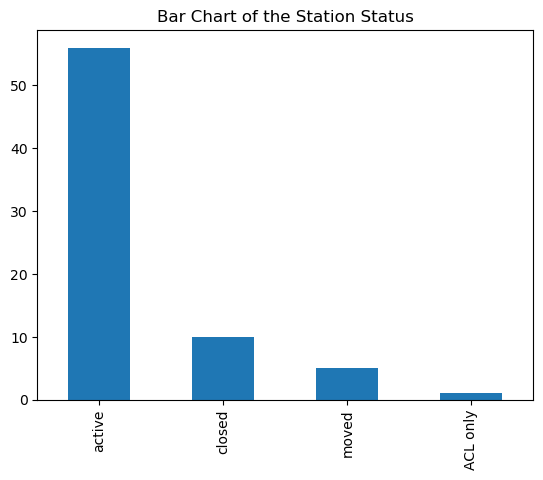

In [14]:
data.status.value_counts().plot.bar(title = "Bar Chart of the Station Status");

In [15]:
print("The percentages for the status of the stations:")
data.status.value_counts(normalize=True)* 100

The percentages for the status of the stations:


active      77.777778
closed      13.888889
moved        6.944444
ACL only     1.388889
Name: status, dtype: float64

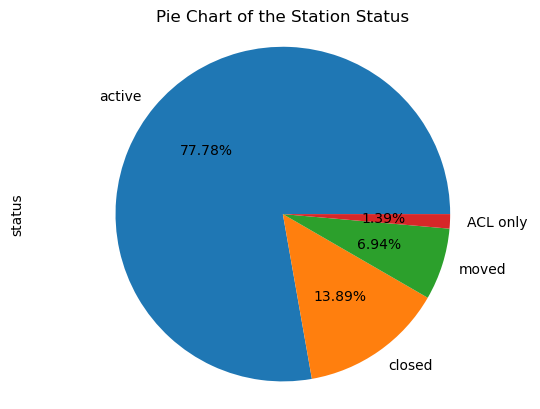

In [16]:
data.status.value_counts().plot.pie(autopct='%1.2f%%',
                                     title = "Pie Chart of the Station Status")
plt.axis('equal')
plt.show()

In [17]:
# To show stations that are still active.  

active_station = data.query ('status == "active"')
active_station

,latitude,location,longitude,name,station_id,status
0,30.27041,(30.27041 -97.75046),-97.75046,West & 6th St.,2537,active
1,30.26452,(30.26452 -97.7712),-97.77120,Barton Springs Pool,2572,active
6,30.24891,(30.24891 -97.75019),-97.75019,South Congress & Elizabeth,2504,active
8,30.26217,(30.26217 -97.72743),-97.72743,Plaza Saltillo,2542,active
9,30.28576,(30.28576 -97.74181),-97.74181,UT West Mall @ Guadalupe,2548,active
10,30.27336,(30.27336 -97.73805),-97.73805,State Capitol Visitors Garage @ San Jacinto & ...,2561,active
11,30.26735,(30.26735 -97.73933),-97.73933,Trinity & 6th Street,2565,active
12,30.26717,(30.26717 -97.75484),-97.75484,Pfluger Bridge @ W 2nd Street,2566,active
13,30.26854,(30.26854 -97.73646),-97.73646,Red River & 8th Street,2571,active
15,30.25579,(30.25579 -97.73982),-97.73982,Rainey St @ Cummings,2707,active


In [18]:
# To show stations that have closed. 

closed_station = data.query ('status == "closed"')
closed_station

,latitude,location,longitude,name,station_id,status
2,30.27595,(30.27595 -97.74739),-97.74739,ACC - Rio Grande & 12th,2545,closed
3,30.28480,(30.2848 -97.72756),-97.72756,Red River & LBJ Library,1004,closed
7,30.26461,(30.26461 -97.73049),-97.73049,Waller & 6th St.,2536,closed
14,30.25802,(30.25802 -97.7391),-97.73910,Rainey @ River St,2576,closed
23,30.27907,(30.27907 -97.73715),-97.73715,State Parking Garage @ Brazos & 18th,1005,closed
26,30.26304,(30.26304 -97.75824),-97.75824,Toomey Rd @ South Lamar,2712,closed
47,30.27624,(30.27624 -97.74831),-97.74831,ACC - West & 12th Street,2546,closed
49,30.26383,(30.26383 -97.72864),-97.72864,6th & Navasota St.,1002,closed
50,30.27106,(30.27106 -97.74563),-97.74563,8th & Guadalupe,1003,closed
61,30.26025,(30.26025 -97.71002),-97.71002,East 7th & Pleasant Valley,3381,closed


In [19]:
# To show stations that have moved. 

moved_station = data.query ('status == "moved"')
moved_station

,latitude,location,longitude,name,station_id,status
4,30.26694,(30.26694 -97.74939),-97.74939,Nueces @ 3rd,1008,moved
5,30.26751,(30.26751 -97.74802),-97.74802,Republic Square,2500,moved
27,30.26774,(30.26774 -97.74692),-97.74692,Republic Square @ Guadalupe & 4th St.,2550,moved
59,30.28395,(30.28395 -97.74198),-97.74198,Guadalupe & 21st,2547,moved
70,30.26416,(30.26416 -97.73289),-97.73289,5th & San Marcos,2564,moved


In [20]:
# To show station with ACL only status. 

ACLonly_station = data.query ('status == "ACL only"')
ACLonly_station

,latitude,location,longitude,name,station_id,status
51,30.26587,(30.26587 -97.76826),-97.76826,Zilker Park West,1006,ACL only


Austin has 56 active stations, 10 closed stations, 5 moved stations and 1 ACL only station. 

<AxesSubplot:xlabel='latitude', ylabel='Count'>

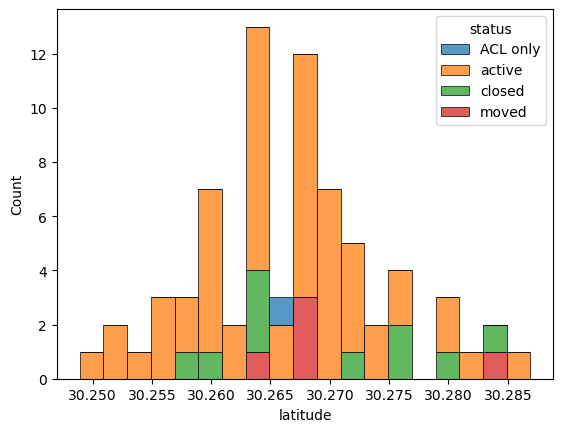

In [21]:
sns.histplot(data = data, x=data['latitude'], linewidth=0.5, binwidth=0.002, hue='status', multiple="stack")


<AxesSubplot:xlabel='latitude', ylabel='Density'>

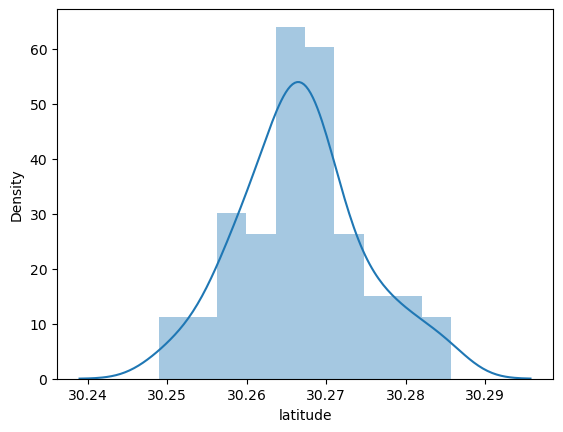

In [22]:
sns.distplot(data['latitude'], hist = True, kde = True)

<AxesSubplot:xlabel='longitude', ylabel='Count'>

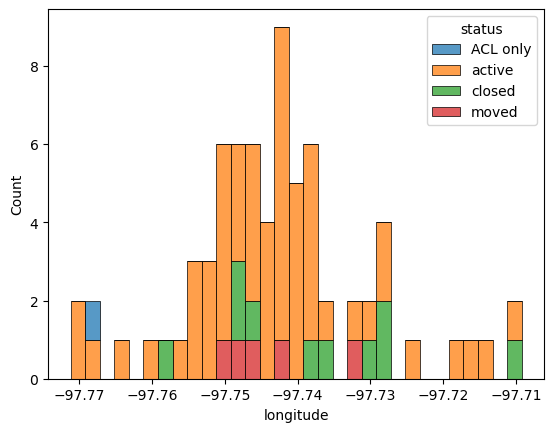

In [23]:
sns.histplot(data = data, x=data['longitude'], linewidth=0.5, binwidth=0.002, hue='status', multiple="stack")

<AxesSubplot:xlabel='longitude', ylabel='Density'>

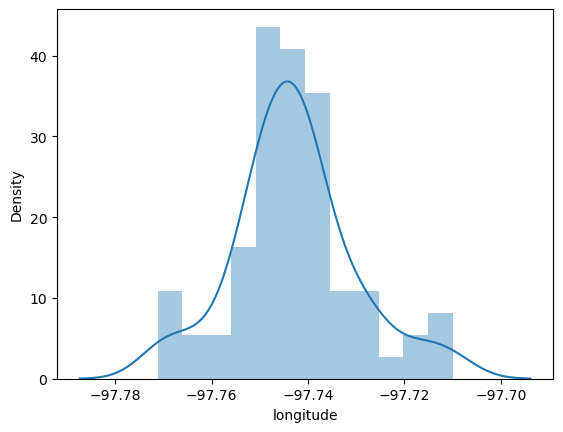

In [24]:
sns.distplot(data['longitude'], hist = True, kde = True)

In [25]:
data.skew()

latitude      0.264022
longitude     0.334419
station_id   -0.846747
dtype: float64

The skewness for longitude and latitude is near to 0, so we can assume that the data is fairly symmetrical. Therefore the longitude and latitude represent a normal distribution.

In [26]:
data.kurtosis()

latitude      0.154288
longitude     0.831833
station_id    0.979855
dtype: float64

In [27]:
data.describe(include = 'object')

,location,name
count,72,72
unique,72,72
top,(30.27041 -97.75046),West & 6th St.
freq,1,1


In [28]:
data.describe()

,latitude,longitude,station_id
count,72.000000,72.000000,72.000000
mean,30.266822,-97.742937,2625.055556
std,0.007811,0.012681,708.966633
min,30.248910,-97.771200,1001.000000
25%,30.262128,-97.749315,2503.750000
50%,30.266955,-97.743200,2562.500000
75%,30.270573,-97.738360,2940.000000
max,30.285760,-97.710020,3687.000000


In [29]:
data.to_csv('eda_bikeshare_station.csv')